In [26]:
import pandas as pd
import numpy as np

In [27]:
data = pd.ExcelFile('/home/xenakas/Desktop/Git/hierarchical_modelling/data/rus/rosstat/gdp_rus_2004.xlsx')

data.sheet_names

df1 = data.parse('Лист1') 

df1 = df1.dropna(how='all') 

df1 = df1.drop(df1.index[[0, 1, 2]]) 

df1 = df1.drop(df1.columns[1], axis = 1) 

#df1.iat[0,0] = 'Субъект'

df1.columns = df1.iloc[0]

df1 = df1.drop(df1.index[[0, 1]]) # drop colnames and total by RF

df1 = df1.set_index(df1.iloc[:,0].values)

df1 = df1.drop(df1.columns[0], axis = 1) 


df1 = df1.stack().to_frame()

df1.columns = ['value']

df1['year'] = [2004] * len(df1.values)

In [ ]:
gdp_rus = pd.DataFrame()

for yeah in range(2004,2017): 
    file_name = '/home/xenakas/Desktop/Git/hierarchical_modelling/data/rus/rosstat/gdp_rus_' + str(yeah) + '.xlsx' 
    data = pd.ExcelFile(file_name)
    df = data.parse('Лист1') 

    df = df.dropna(how='all') 
    df = df.drop(df.index[[0, 1, 2]]) 
    df = df.drop(df.columns[1], axis = 1) 
    #df.iat[0,0] = 'Субъект'

    df.columns = df.iloc[0]
    df = df.drop(df.index[[0, 1]]) # drop colnames and total by RF

    df = df.set_index(df.iloc[:,0].values)
    df = df.drop(df.columns[0], axis = 1) 
    
    df = df.stack().to_frame()
    df.columns = ['value']
    df['year'] = [yeah] * len(df.values)
    
    gdp_rus = gdp_rus.append(df)


In [29]:
#gdp_rus.to_csv("gdp_unstacked.csv")
df_gdp = pd.read_csv('/home/xenakas/Desktop/Git/hierarchical_modelling/data/rus/gdprus_unstacked.csv')

#df_gdp.value = df_gdp.value.astype(float)

df_gdp['value'] = pd.to_numeric(df_gdp['value'], errors='coerce')

states = ['Центральный федеральный округ',       'Северо-Западный федеральный округ', 
      'Южный федеральный округ', 'Северо-Кавказский федеральный округ', 'Приволжский федеральный округ', 'Уральский федеральный округ',
       'Сибирский федеральный округ', 'Дальневосточный федеральный округ']

extras =    [  ' в том числе Ненецкий автономный округ',      '   в том числе Ханты-Мансийский автономный округ',      '  в т.ч. Ненецкий автономный округ', '   в т.ч. Ханты-Мансийский автономный округ-Югра', '    в т.ч. Ненецкий автономный округ', '  в т.ч. Ханты-Мансийский АО',  '  в т.ч. Ханты-Мансийский автономный округ', '  Архангельская область без Ненецкого авт.округа',        '           Тюменская область (без Ханты-Мансийского авт.округа-Югра и Ямало-Ненецкого авт.округа)',  '  Архангельская область без авт.округа'   ]

cities = [  'Москва',    'Санкт-Петербург', 'Севастополь']

df_gdp =  df_gdp[df_gdp['geo'].isin(states) == False]

df_gdp =  df_gdp[df_gdp['geo'].isin(extras) == False]

ind   = ['область', ' ', 'округ', 'автономный',  'автономная', 'край', 'республика', 'Республика', 
         'АО', '(Якутия)', 'г.', ' ', '.']

for str in ind:
    df_gdp['geo']  = [i.replace(str, '') for i in df_gdp['geo']]

df_gdp =  df_gdp[df_gdp['geo'].isin(cities) == False]    

len(df_gdp.geo.unique()) == 85-4

indus = ['; обязательное социальное страхование', '; социальное страхование', ';  социальное страхование']

for str in indus:
    df_gdp['ind']  = [i.replace(str, '') for i in df_gdp['ind']]

    

In [32]:
df_gdp = df_gdp[df_gdp['ind'] != 'Деятельность домашних хозяйств']

In [33]:
pivot_gdp = pd.pivot_table(df_gdp, index='year', columns=[ 'geo', 'ind'], values = 'value')

pivot_gdp

#pivot_gdp.to_csv("gdprus_stacked_by_geo.csv")

geo                 Адыгея  \
ind  Гостиницы и рестораны   
year                         
2004                   0.7   
2005                   0.5   
2006                   0.7   
2007                   0.7   
2008                   0.9   
2009                   1.0   
2010                   1.0   
2011                   1.0   
2012                   0.9   
2013                   1.0   
2014                   1.2   
2015                   1.4   
2016                   1.3   

geo                                                                 \
ind  Государственное управление и обеспечение военной безопасности   
year                                                                 
2004                                                8.4              
2005                                               10.1              
2006                                               13.1              
2007                                               11.6              
2008                                               11.5              
2009                                               11.0              
2010                                               10.1              
2011                                                9.6              
2012                                               10.4              
2013                                               10.5              
2014                                               11.1              
2015                                               10.0              
2016                                                9.2              

geo                              \
ind  Добыча полезных ископаемых   
year                              
2004                        0.9   
2005                        1.3   
2006                        1.4   
2007                        2.4   
2008                        3.1   
2009                        1.0   
2010                        0.7   
2011                        0.8   
2012                        1.0   
2013                        0.8   
2014                        0.7   
2015                        0.7   
2016                        1.0   

geo                                                     \
ind  Здравоохранение и предоставление социальных услуг   
year                                                     
2004                                               8.9   
2005                                               6.9   
2006                                               7.5   
2007                                               7.0   
2008                                               6.3   
2009                                               6.2   
2010                                               5.9   
2011                                               5.6   
2012                                               5.4   
2013                                               6.0   
2014                                               6.5   
2015                                               6.1   
2016                                               5.7   

geo                                           \
ind  Обрабатывающие производства Образование   
year                                           
2004                        14.0         7.2   
2005                        12.9         6.6   
2006                        12.5         6.6   
2007                        12.3         5.9   
2008                        12.6         5.9   
2009                        13.6         6.2   
2010                        15.2         5.3   
2011                        14.3         5.7   
2012                        14.7         5.4   
2013                        15.3         6.0   
2014                        16.5         5.9   
2015                        18.2         5.5   
2016                        18.2         5.1   

geo                                                                   \
ind  Операции с недвижимым имуществом, аренда и предоставление услу

 ...]

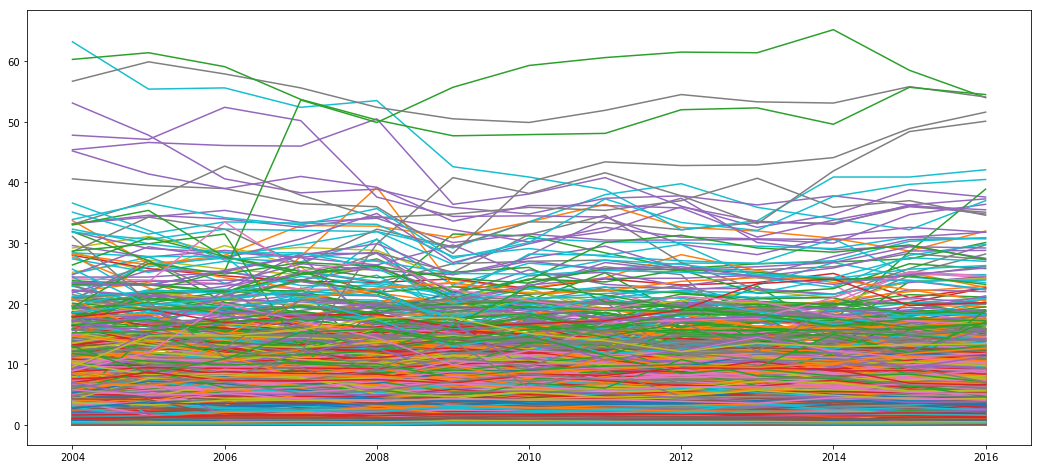

In [35]:
import matplotlib.pyplot as pp

pp.figure(figsize = (18, 8))
pp.plot(pivot_gdp)



In [91]:
pivot_geosum = pd.pivot_table(df_gdp, index='year', columns='geo', aggfunc=np.sum) 

pivot_geosum.head(3)


value                                                                    \
geo  Адыгея  Алтай Алтайский Амурская Архангельская Астраханская Башкортостан   
year                                                                            
2004  100.0  100.0     100.0    100.0         100.0        100.0        100.0   
2005  100.0  100.0     100.0    100.0         100.0        100.0        100.0   
2006  100.0  100.0     100.0    100.0         100.0        100.0        100.0   

                                       ...                             \
geo  Белгородская Брянская Бурятия     ...     Удмуртская Ульяновская   
year                                   ...                              
2004        100.0    100.0   100.0     ...          100.0       100.0   
2005        100.0    100.0   100.0     ...          100.0       100.0   
2006        100.0    100.0   100.0     ...          100.0       100.0   

                                                                    \
geo  Хабаровский Хакасия Челябинская Чеченская Чувашская Чукотский   
year                                                                 
2004       100.0   100.0       100.0       0.0     100.0     100.0   
2005       100.0   100.0       100.0     100.0     100.0     100.0   
2006       100.0   100.0       100.0     100.0     100.0     100.0   

                                 
geo  Ямало-Ненецкий Ярославская  
year                             
2004          100.0       100.0  
2005          100.0       100.0  
2006          100.0       100.0  

[3 rows x 81 columns]